In [33]:
import matplotlib.pyplot as plt
import numpy as np
from mnist_processing import load_mnist, show_img
from nn.preprocessing import rescalling

In [16]:
data_path = 'D:/Content_2/NN from scratch/NeuralNetworks/data/MNIST'

In [17]:
X_train, y_train, X_test, y_test = load_mnist(data_path)

In [18]:
X_train = X_train.T
y_train = y_train.reshape(1, -1)

In [19]:
X_train.shape

(784, 60000)

In [20]:
y_train.shape

(1, 60000)

In [21]:
X_train = rescalling(X_train, 1./255)
X_test = rescalling(X_test, 1./255)

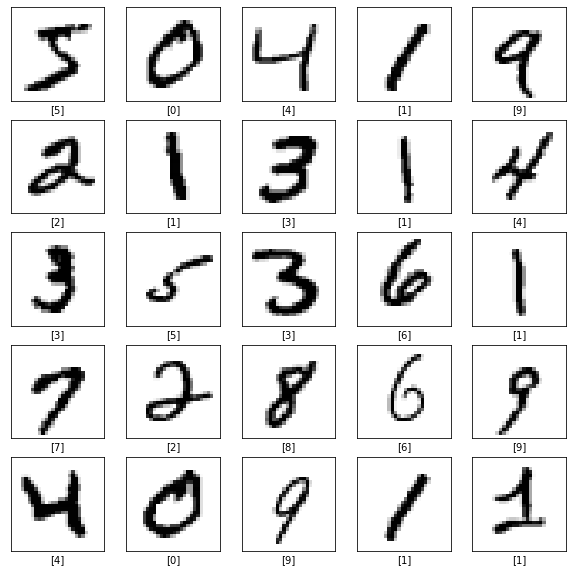

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[:, i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[:, i])
plt.show()

# Model

In [10]:
from nn import NeuralNet, initializers, optimizations

In [31]:
model = NeuralNet()

In [32]:
model.add_dense_layer(128, 'relu')
# model.add_dense_layer(128, 'relu', L2_regularization_lambda=0.001)
model.add_dense_layer(10, 'softmax')

In [33]:
initializer = initializers.He()
# initializer = initializers.RandomNormal()

In [34]:
# optimizer = optimizations.GradientDescent(0.1)
optimizer = optimizations.Adam(0.01)

In [35]:
model.compile(optimizer, initializer, 'categorical-cross-entropy', 'accuracy')

In [36]:
from datetime import datetime

In [37]:
start = datetime.now()
model.fit(X_train, y_train, 128, 10, shuffle=False, print_each_n=1)
end = datetime.now()
diff = (end - start).total_seconds() / 60
print('training took', diff, 'mins')

Epoch 1/10 cost of 0.24575041619528482
Epoch 2/10 cost of 0.12078277670316202
Epoch 3/10 cost of 0.09150201033749933
Epoch 4/10 cost of 0.08063981694883024
Epoch 5/10 cost of 0.07172517216033032
Epoch 6/10 cost of 0.06827212200204678
Epoch 7/10 cost of 0.060600716019284157
Epoch 8/10 cost of 0.05550622344358092
Epoch 9/10 cost of 0.05795660818718684
Epoch 10/10 cost of 0.061865209345904434
training took 0.30874098333333333 mins


In [38]:
print(model.evaluate(X_train, y_train))

(0.04731963615856048, 0.9862333333333333)


In [23]:
X_test = X_test.T
y_test = y_test.reshape(1, -1)

In [40]:
print(model.evaluate(X_test, y_test))

(0.1557220521786936, 0.9713)


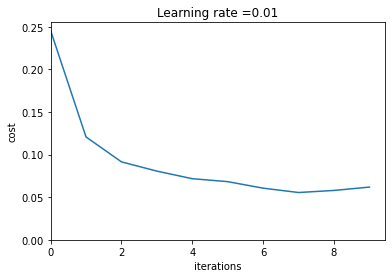

In [41]:
model.plot_cost()

In [42]:
model.save('mnist_model.pkl')

# Load the model

In [24]:
from nn.neural_network import load_model
loaded_model = load_model('mnist_model.pkl')

# Predictions

In [25]:
loaded_model.predict(X_test[:, 1])

array([[2]], dtype=int64)

In [27]:
predictions = loaded_model.predict(X_test)

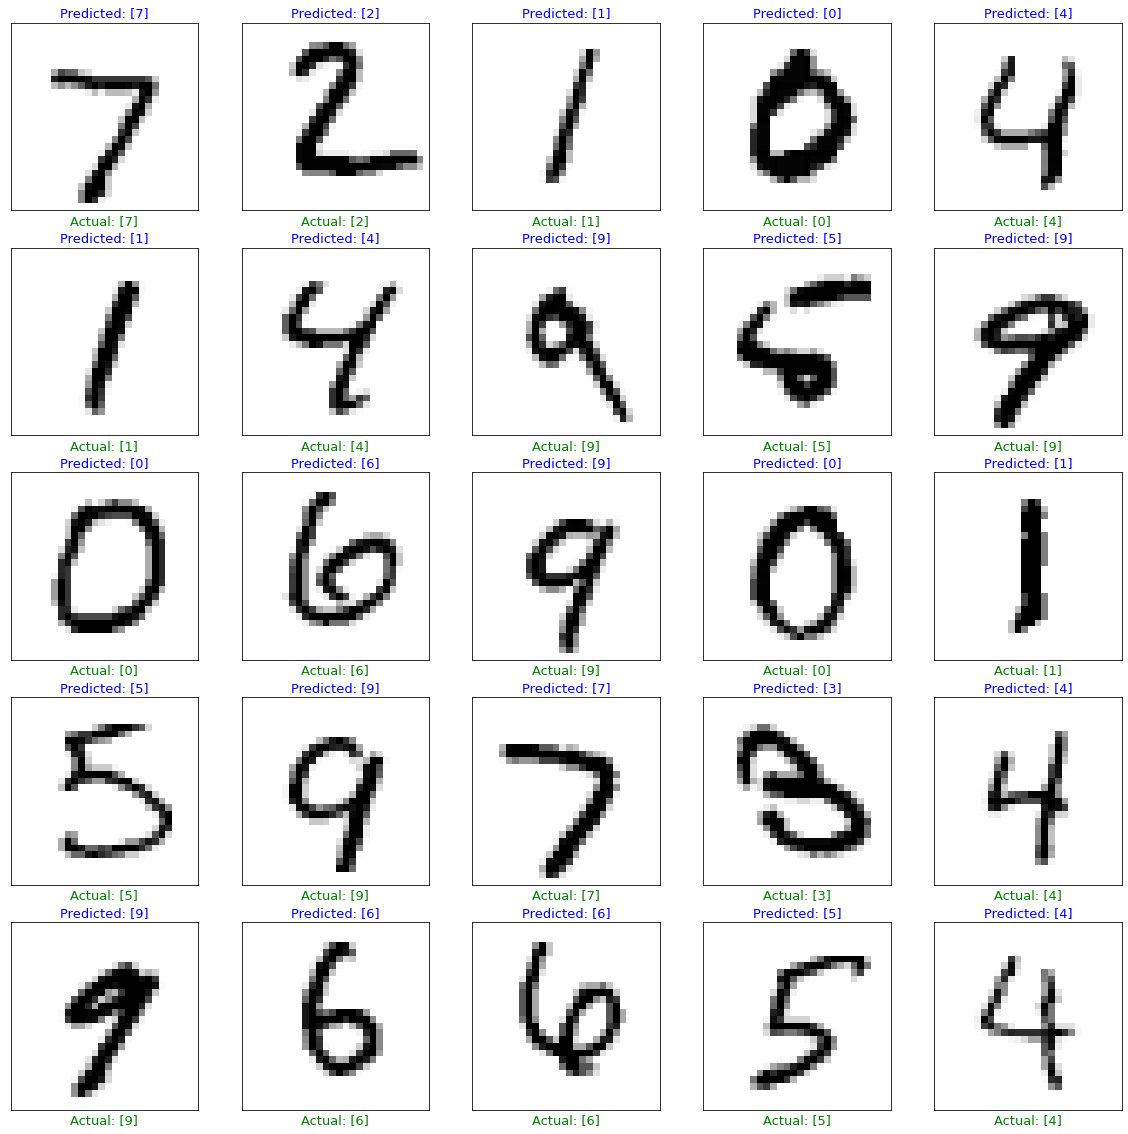

In [43]:
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.imshow(X_test[:, i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Actual: {y_test[:, i]}', fontsize=13, color='green')
    color = 'blue' if y_test[:, i] == predictions[:, i] else 'red'
    plt.title(f'Predicted: {predictions[:, i]}', fontsize=13, color=color)
plt.show()